# COVID-19 Global Data Tracker


## Import Required Libraries
import the libraries needed for the analysis:

In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Set the style for our plots
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

# Configure plot settings for better visualization
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Data Collection


In [2]:
# Define the paths to our COVID-19 datasets
country_data_path = 'COVID-19 Dataset/country_wise_latest.csv'
time_series_data_path = 'COVID-19 Dataset/day_wise.csv'

# Load the datasets
country_df = pd.read_csv(country_data_path)
time_series_df = pd.read_csv(time_series_data_path)

print(f"Country-wise data loaded with {country_df.shape[0]} rows and {country_df.shape[1]} columns")
print(f"Time-series data loaded with {time_series_df.shape[0]} rows and {time_series_df.shape[1]} columns")

Country-wise data loaded with 187 rows and 15 columns
Time-series data loaded with 188 rows and 12 columns


## Data Loading & Exploration

In [3]:
# Explore the country-wise dataset
print("\nCountry-wise dataset - first 5 rows:")
print(country_df.head())

print("\nCountry-wise dataset - column names:")
print(country_df.columns.tolist())

print("\nCountry-wise dataset - data types:")
print(country_df.dtypes)

print("\nCountry-wise dataset - missing values:")
print(country_df.isnull().sum())


Country-wise dataset - first 5 rows:
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04      

In [4]:
# Explore the time-series dataset
print("\nTime-series dataset - first 5 rows:")
print(time_series_df.head())

print("\nTime-series dataset - column names:")
print(time_series_df.columns.tolist())

print("\nTime-series dataset - data types:")
print(time_series_df.dtypes)

print("\nTime-series dataset - missing values:")
print(time_series_df.isnull().sum())


Time-series dataset - first 5 rows:
         Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0  2020-01-22        555      17         28     510          0           0   
1  2020-01-23        654      18         30     606         99           1   
2  2020-01-24        941      26         36     879        287           8   
3  2020-01-25       1434      42         39    1353        493          16   
4  2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.

## Data Cleaning


In [5]:
# Clean the country-wise dataset

# Make a copy of the original data to avoid modifying it
country_clean = country_df.copy()

# Convert column names to snake_case for consistency
country_clean.columns = country_clean.columns.str.replace('/', '_').str.replace(' ', '_').str.lower()

# Filter for countries of interest (e.g., Kenya, USA, India, and others)
countries_of_interest = ['Kenya', 'US', 'India', 'China', 'Italy', 'South Africa', 'Brazil', 'United Kingdom', 'Russia']

# Create a filtered dataset for the countries of interest
country_filtered = country_clean[country_clean['country_region'].isin(countries_of_interest)]

# Check the filtered dataset
print("Filtered dataset for countries of interest:")
print(country_filtered[['country_region', 'confirmed', 'deaths', 'recovered', 'active']].reset_index(drop=True))

Filtered dataset for countries of interest:
   country_region  confirmed  deaths  recovered   active
0          Brazil    2442375   87618    1846641   508116
1           China      86783    4656      78869     3258
2           India    1480073   33408     951166   495499
3           Italy     246286   35112     198593    12581
4           Kenya      17975     285       7833     9857
5          Russia     816680   13334     602249   201097
6    South Africa     452529    7067     274925   170537
7              US    4290259  148011    1325804  2816444
8  United Kingdom     301708   45844       1437   254427


In [6]:
# Clean the time-series dataset

# Make a copy of the original data to avoid modifying it
time_series_clean = time_series_df.copy()

# Convert column names to snake_case for consistency
time_series_clean.columns = time_series_clean.columns.str.replace('/', '_').str.replace(' ', '_').str.lower()

# Convert the date column to datetime
time_series_clean['date'] = pd.to_datetime(time_series_clean['date'])

# Sort by date
time_series_clean = time_series_clean.sort_values('date')

# Fill missing values (if any)
time_series_clean = time_series_clean.fillna(method='ffill')

# Check the cleaned time-series dataset
print("\nCleaned time-series dataset:")
print(time_series_clean.head())


Cleaned time-series dataset:
        date  confirmed  deaths  recovered  active  new_cases  new_deaths  \
0 2020-01-22        555      17         28     510          0           0   
1 2020-01-23        654      18         30     606         99           1   
2 2020-01-24        941      26         36     879        287           8   
3 2020-01-25       1434      42         39    1353        493          16   
4 2020-01-26       2118      56         52    2010        684          14   

   new_recovered  deaths___100_cases  recovered___100_cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   deaths___100_recovered  no._of_countries  
0                   60.71                 6  
1                   60.00           

C:\Users\Abdisalam\AppData\Local\Temp\ipykernel_16860\3517674243.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_clean = time_series_clean.fillna(method='ffill')


## Exploratory Data Analysis (EDA)


In [7]:
# Get global stats from the time-series data
latest_global = time_series_clean.iloc[-1]
print("Global COVID-19 Statistics (as of {}):".format(latest_global['date'].strftime('%Y-%m-%d')))
print(f"Total Confirmed Cases: {latest_global['confirmed']:,}")
print(f"Total Deaths: {latest_global['deaths']:,}")
print(f"Total Recovered: {latest_global['recovered']:,}")
print(f"Active Cases: {latest_global['active']:,}")
print(f"Death Rate: {latest_global['deaths___100_cases']:.2f}%")
print(f"Recovery Rate: {latest_global['recovered___100_cases']:.2f}%")

Global COVID-19 Statistics (as of 2020-07-27):
Total Confirmed Cases: 16,480,485
Total Deaths: 654,036
Total Recovered: 9,468,087
Active Cases: 6,358,362
Death Rate: 3.97%
Recovery Rate: 57.45%


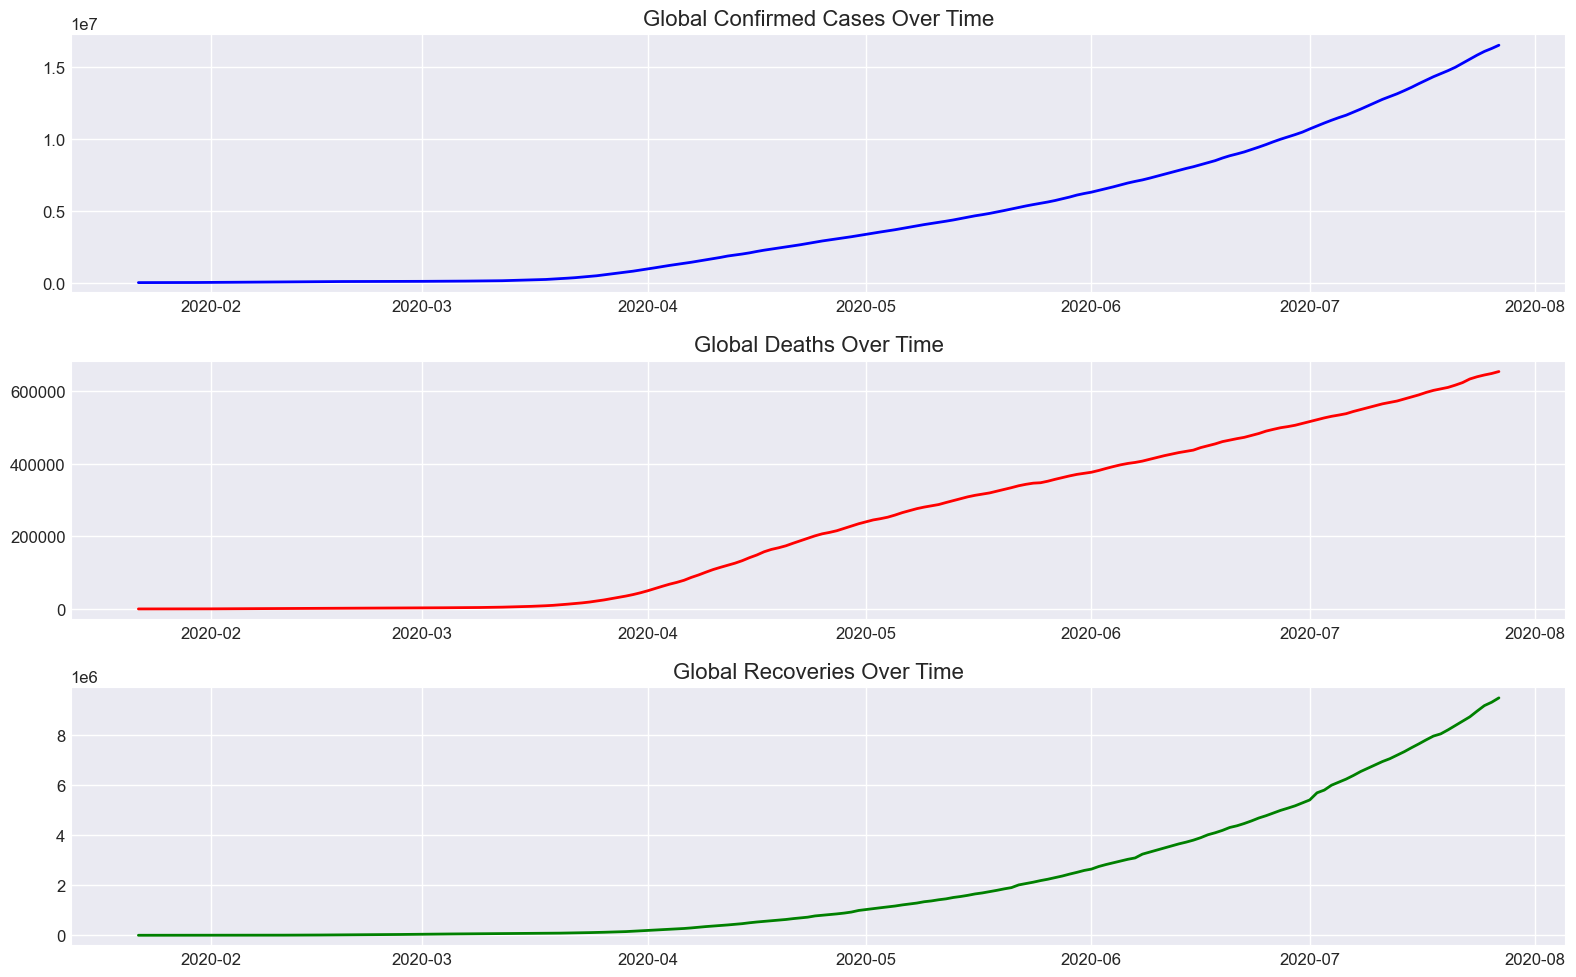

In [8]:
# Visualize global confirmed cases, deaths, and recoveries over time
plt.figure(figsize=(16, 10))
plt.subplot(3, 1, 1)
plt.plot(time_series_clean['date'], time_series_clean['confirmed'], 'b-', linewidth=2)
plt.title('Global Confirmed Cases Over Time')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(time_series_clean['date'], time_series_clean['deaths'], 'r-', linewidth=2)
plt.title('Global Deaths Over Time')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(time_series_clean['date'], time_series_clean['recovered'], 'g-', linewidth=2)
plt.title('Global Recoveries Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()

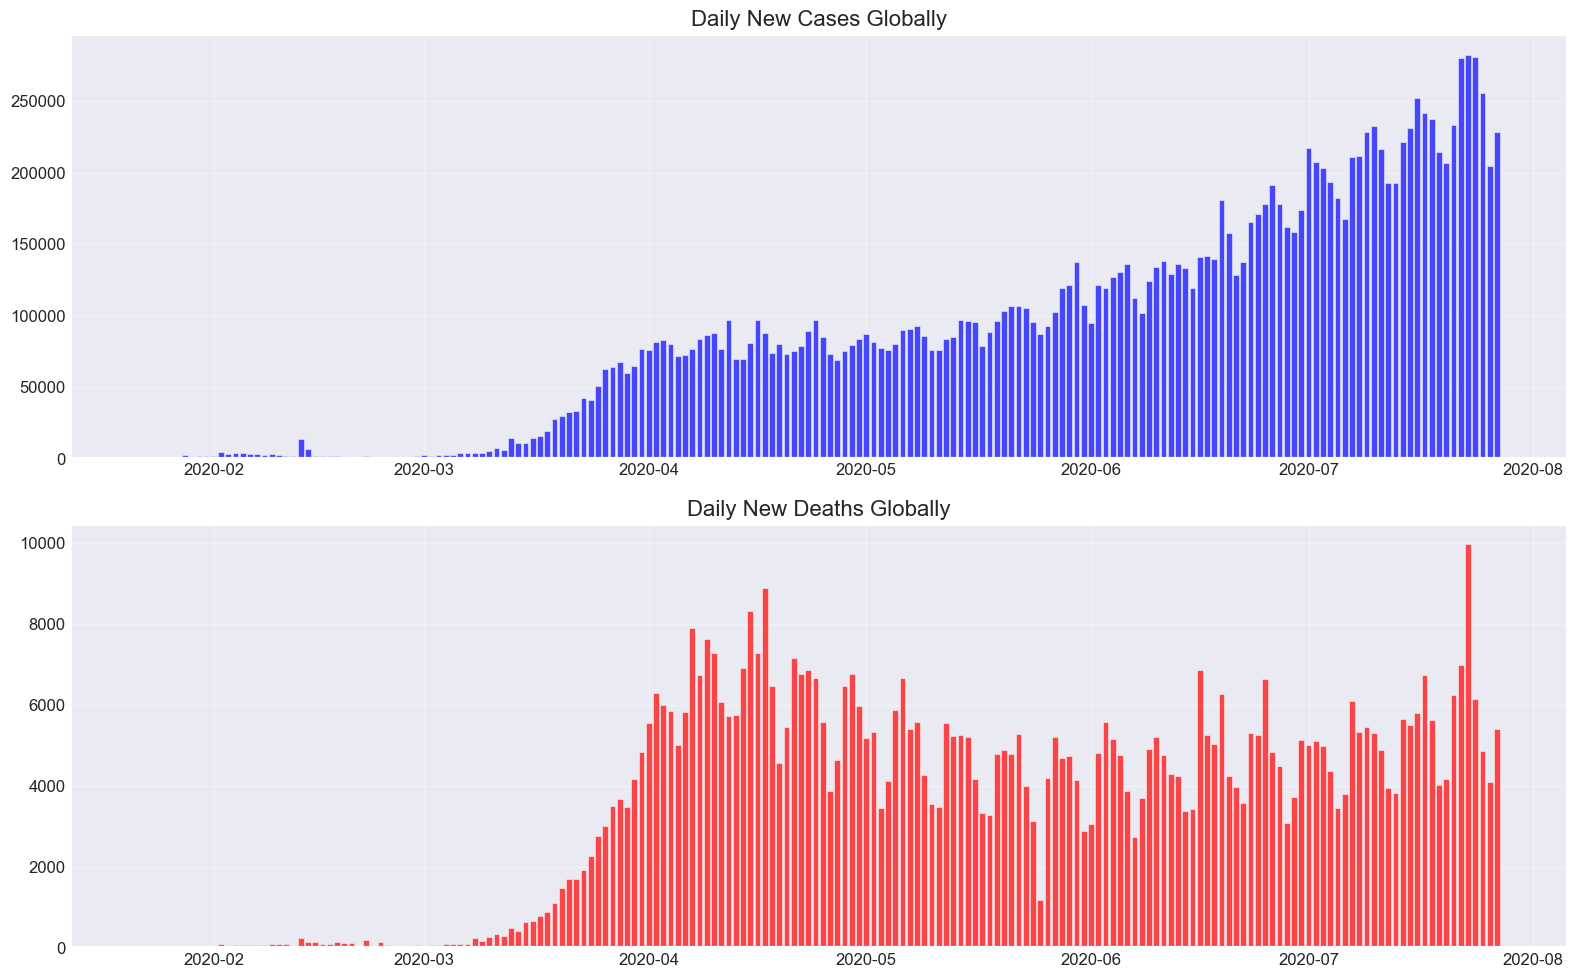

In [9]:
# Visualize daily new cases and deaths
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
plt.bar(time_series_clean['date'], time_series_clean['new_cases'], color='blue', alpha=0.7)
plt.title('Daily New Cases Globally')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.bar(time_series_clean['date'], time_series_clean['new_deaths'], color='red', alpha=0.7)
plt.title('Daily New Deaths Globally')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\Abdisalam\AppData\Local\Temp\ipykernel_16860\3163069535.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_region', y='confirmed', data=top_countries, palette='viridis')


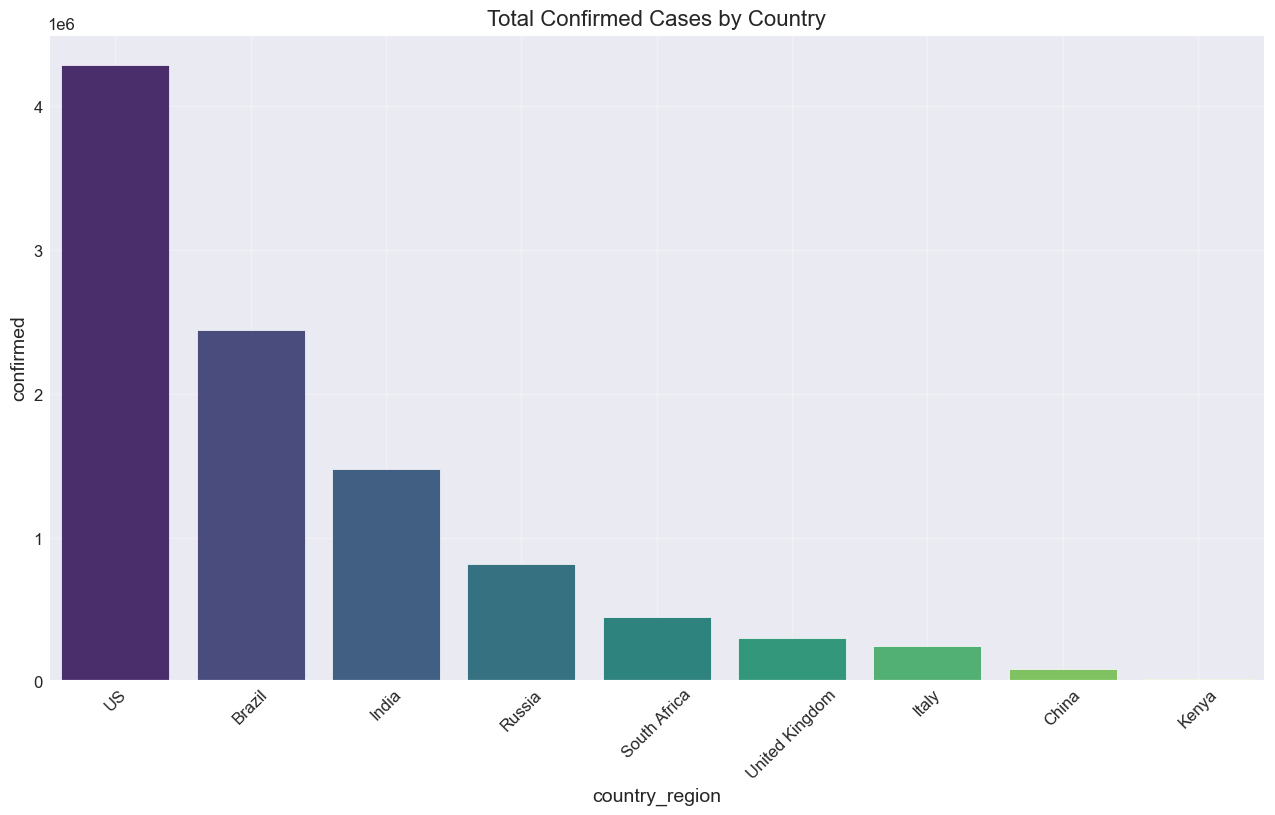

C:\Users\Abdisalam\AppData\Local\Temp\ipykernel_16860\3163069535.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_region', y='deaths', data=top_countries, palette='rocket')


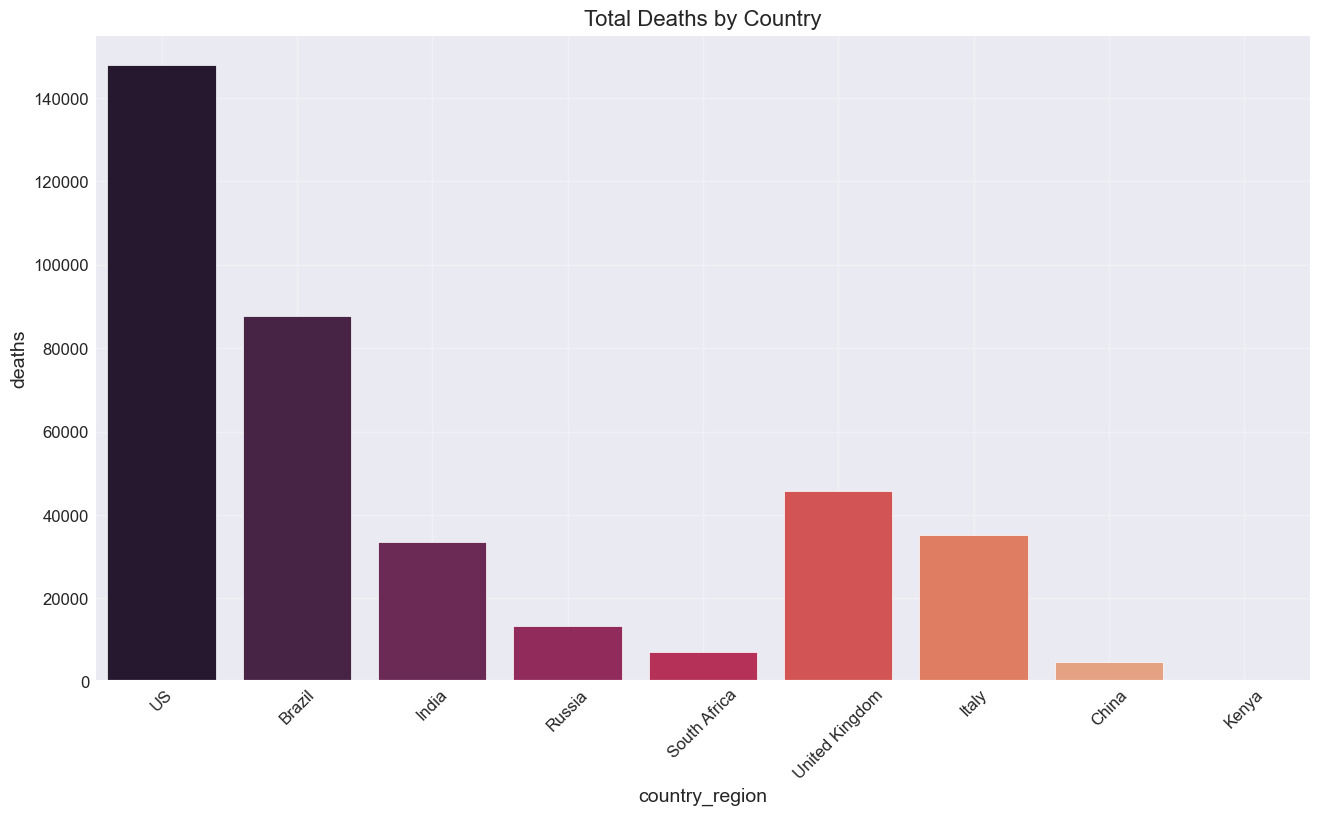

C:\Users\Abdisalam\AppData\Local\Temp\ipykernel_16860\3163069535.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_region', y='deaths___100_cases', data=top_countries, palette='coolwarm')


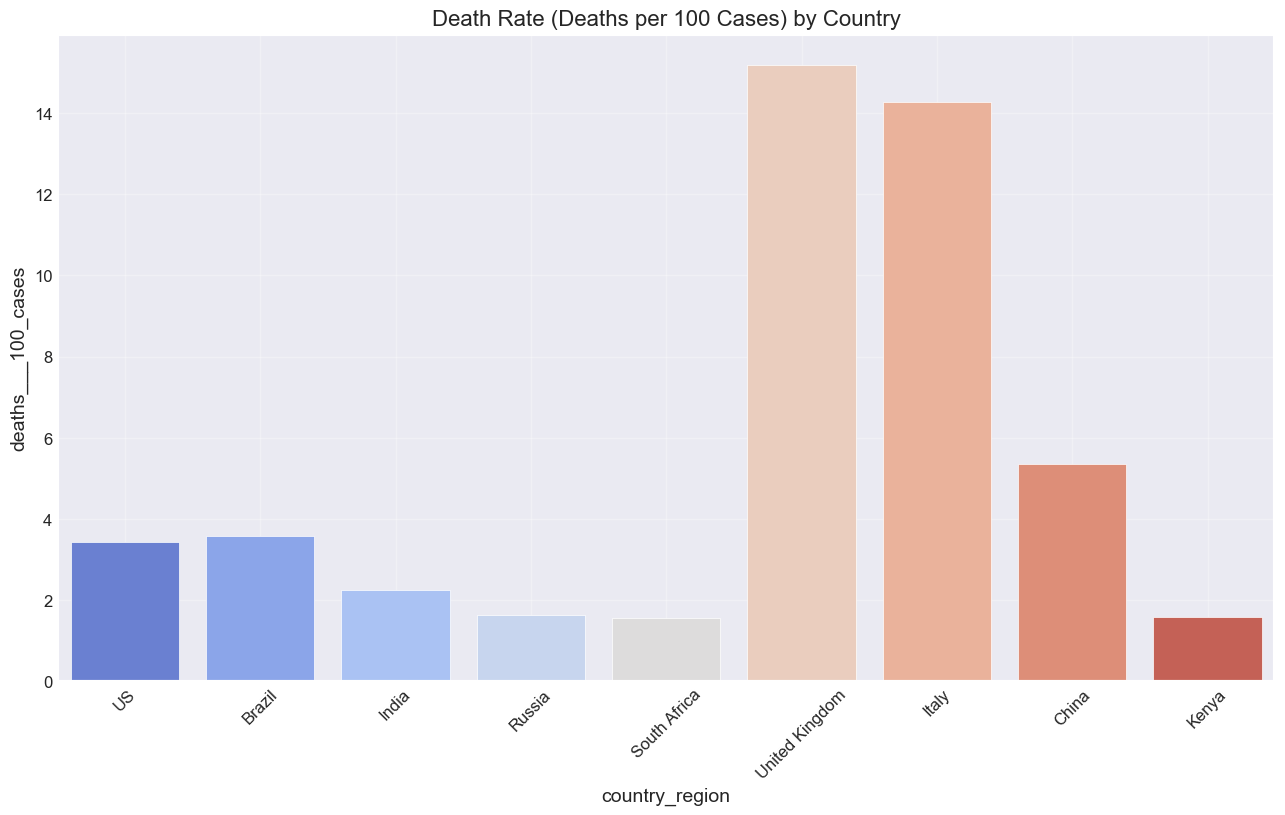

In [10]:
# Compare confirmed cases, deaths, and recovery rates among countries of interest

# Sort countries by confirmed cases in descending order
top_countries = country_filtered.sort_values('confirmed', ascending=False)

# Plot confirmed cases by country
plt.figure(figsize=(14, 8))
sns.barplot(x='country_region', y='confirmed', data=top_countries, palette='viridis')
plt.title('Total Confirmed Cases by Country')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# Plot deaths by country
plt.figure(figsize=(14, 8))
sns.barplot(x='country_region', y='deaths', data=top_countries, palette='rocket')
plt.title('Total Deaths by Country')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# Calculate and plot death rates
plt.figure(figsize=(14, 8))
sns.barplot(x='country_region', y='deaths___100_cases', data=top_countries, palette='coolwarm')
plt.title('Death Rate (Deaths per 100 Cases) by Country')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

## Insights & Reporting

In [11]:
# Calculate additional statistics for reporting

# Get the latest date in the time series data
latest_date = time_series_clean['date'].max()
print(f"Latest data date: {latest_date.strftime('%Y-%m-%d')}")

# Calculate week-over-week growth rates
two_weeks_ago = time_series_clean[time_series_clean['date'] <= latest_date - pd.Timedelta(days=14)]['confirmed'].max()
one_week_ago = time_series_clean[time_series_clean['date'] <= latest_date - pd.Timedelta(days=7)]['confirmed'].max()
current = time_series_clean[time_series_clean['date'] <= latest_date]['confirmed'].max()

week_over_week_growth_previous = ((one_week_ago - two_weeks_ago) / two_weeks_ago) * 100
week_over_week_growth_current = ((current - one_week_ago) / one_week_ago) * 100

print(f"Week-over-week growth rate (previous week): {week_over_week_growth_previous:.2f}%")
print(f"Week-over-week growth rate (current week): {week_over_week_growth_current:.2f}%")

# Calculate average daily new cases for the most recent 7 days
recent_daily_cases = time_series_clean.tail(7)['new_cases'].mean()
print(f"Average daily new cases (last 7 days): {recent_daily_cases:.2f}")

Latest data date: 2020-07-27
Week-over-week growth rate (previous week): 12.25%
Week-over-week growth rate (current week): 12.01%
Average daily new cases (last 7 days): 252425.14


## Optional: Build a Choropleth Map

In [12]:
# Create a choropleth map using Plotly Express

try:
    # Create a world map of confirmed cases
    fig = px.choropleth(
        country_clean,
        locations="country_region",  # country names
        locationmode="country names",  # use country names for matching
        color="confirmed",  # data to show in colors
        hover_name="country_region",  # data to show when hovering
        color_continuous_scale=px.colors.sequential.Plasma,  # color scale
        title="Global COVID-19 Confirmed Cases"
    )
    
    # Improve layout
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='equirectangular'
        )
    )
    
    # Display the map
    fig.show()
    
    # Create another map for death rates
    fig2 = px.choropleth(
        country_clean,
        locations="country_region",
        locationmode="country names",
        color="deaths___100_cases",
        hover_name="country_region",
        color_continuous_scale=px.colors.sequential.Reds,
        title="Global COVID-19 Death Rates (Deaths per 100 Cases)"
    )
    
    # Improve layout
    fig2.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='equirectangular'
        )
    )
    
    # Display the map
    fig2.show()
    
except Exception as e:
    print(f"Error creating choropleth map: {e}")
    print("Choropleth maps require an internet connection and may not work in all environments.")

Error creating choropleth map: Mime type rendering requires nbformat>=4.2.0 but it is not installed
Choropleth maps require an internet connection and may not work in all environments.
